# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

#### Note about matplotlib:

There are certain bugs associated with some versions of matplotlib. Before you start your analysis, you should check what version you have by typing `matplotlib.__version__` in a Jupyter cell and executing it. If it shows version 3.1.1, you'll likely experience some problems with the way the heatmap appears.

To circumvent this, we recommend opening a new Anaconda terminal and executing this command: `conda update --all`. This will update all of your packages and install the newest version of matplotlib, where this bug has been fixed. 

Then, restart the kernel for your notebook (so it can pick up any changes to your library versions) and rerun your code, which will re-import the libraries in your notebook. Check the version again, and you should have the latest version installed.

In [2]:
matplotlib.__version__

'3.5.1'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path

path = r'/Users/arturassada/Desktop/Brazilian E-Commerce'

In [5]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'data_general.csv'))

### 2. Data Cleaning

#### Renaming Columns:

In [6]:
df.shape

(115723, 35)

In [7]:
df.columns

Index(['Unnamed: 0', 'order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'review_id', 'review_score', 'review_comment_title',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name_english', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [8]:
# Rename columns whose names are too long

df.rename(columns = {'X1 transaction date' : 'Date', 'X2 house age': 'House age', 
                     'X3 distance to the nearest MRT station': 'D. metro', 'X4 number of convenience stores': 'N. shops',
                     'Y house price of unit area': 'Price per unit', 'X5 latitude' : 'Latitude', 'X6 longitude' : 'Longitude' },
                      inplace = True)

In [9]:
df.dtypes

Unnamed: 0                         int64
order_id                          object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
review_id                         object
review_score                     float64
review_comment_title              object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_c

In [11]:
df.head()

,Unnamed: 0,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,...,9.0,14.0,27277,volta redonda,SP,cool_stuff,1.0,credit_card,2.0,72.19
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,30.0,40.0,3471,sao paulo,SP,pet_shop,1.0,credit_card,3.0,259.83
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,13.0,33.0,37564,borda da mata,MG,furniture_decor,1.0,credit_card,5.0,216.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,10.0,15.0,14403,franca,SP,perfumery,1.0,credit_card,2.0,25.78
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,40.0,30.0,87900,loanda,PR,garden_tools,1.0,credit_card,3.0,218.04


#### Missing Values Check:

In [41]:
# Check for missing values

df.isnull().sum() # No missing values!

Unnamed: 0                            0
order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
review_id                           861
review_score                        861
review_comment_title             102139
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
product_category_name              1638
product_name_lenght                1638
product_description_lenght         1638
product_photos_qty                 1638
product_weight_g                     20
product_length_cm                    20


In [122]:
#Not every row has review or order_approved value, etc. That is ok, not every orders has been processed. 

#### Duplicates Check:

In [123]:
# Find duplicates

df_dups = df[df.duplicated()]

In [43]:
df_dups.shape # No duplicates!

(0, 35)

#### Mixed-Type Data:

In [124]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# No mixed-type columns either!

order_approved_at
review_id
review_comment_title
product_category_name
product_category_name_english
payment_type
Price category


### 3. Exploring Relationships

### Correlations:

In [125]:
# Create a correlation matrix using pandas

df.corr()

,Unnamed: 0,order_item_id,price,freight_value,review_score,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value
Unnamed: 0,1.000000,-0.003745,0.000580,-0.003522,0.003705,-0.004107,0.003515,-0.001919,0.007795,0.003376,0.002469,0.003203,-0.000541,-0.000741,-0.000729,-0.000447,-0.003794
order_item_id,-0.003745,1.000000,-0.060448,-0.030192,-0.136765,-0.000780,-0.023473,-0.014274,-0.054149,-0.003495,0.006030,0.029742,-0.009117,-0.018633,-0.001220,0.074060,0.266654
price,0.000580,-0.060448,1.000000,0.414302,0.003644,0.042207,0.019904,0.200815,0.053496,0.338634,0.142751,0.222860,0.173027,0.088388,0.000267,0.277695,0.737533
freight_value,-0.003522,-0.030192,0.414302,1.000000,-0.032523,0.225431,0.025216,0.095042,0.023017,0.610803,0.305055,0.391402,0.323587,0.150903,0.010330,0.185882,0.372654
review_score,0.003705,-0.136765,0.003644,-0.032523,1.000000,-0.026373,-0.013740,0.014247,0.021223,-0.025468,-0.018397,-0.021794,-0.010054,0.027534,0.004940,-0.042897,-0.081014
customer_zip_code_prefix,-0.004107,-0.000780,0.042207,0.225431,-0.026373,1.000000,0.016107,0.024365,0.021083,-0.000161,0.002725,0.011241,-0.011155,0.074157,-0.030081,0.057333,0.053360
product_name_lenght,0.003515,-0.023473,0.019904,0.025216,-0.013740,0.016107,1.000000,0.090413,0.145110,0.022397,0.062328,-0.030379,0.063314,-0.032287,-0.002256,0.021107,0.004512
product_description_lenght,-0.001919,-0.014274,0.200815,0.095042,0.014247,0.024365,0.090413,1.000000,0.119193,0.059648,0.003359,0.073780,-0.069431,0.061133,-0.010521,0.036004,0.157093
product_photos_qty,0.007795,-0.054149,0.053496,0.023017,0.021223,0.021083,0.145110,0.119193,1.000000,0.022600,0.046277,-0.033770,0.007698,-0.041137,-0.008414,-0.000697,0.010508
product_weight_g,0.003376,-0.003495,0.338634,0.610803,-0.025468,-0.000161,0.022397,0.059648,0.022600,1.000000,0.460250,0.583260,0.507658,0.009488,0.029160,0.178581,0.304208


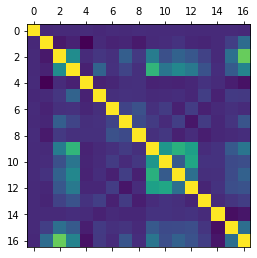

In [46]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

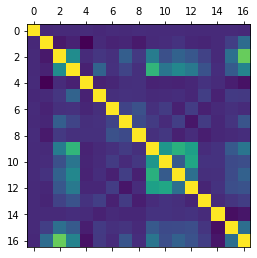

In [47]:
# Save figure
plt.matshow(df.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

In [48]:
#current dir
cwd = os.getcwd()
cwd

'/Users/arturassada/Downloads'

Text(0.5, 1.0, 'Correlation Matrix')

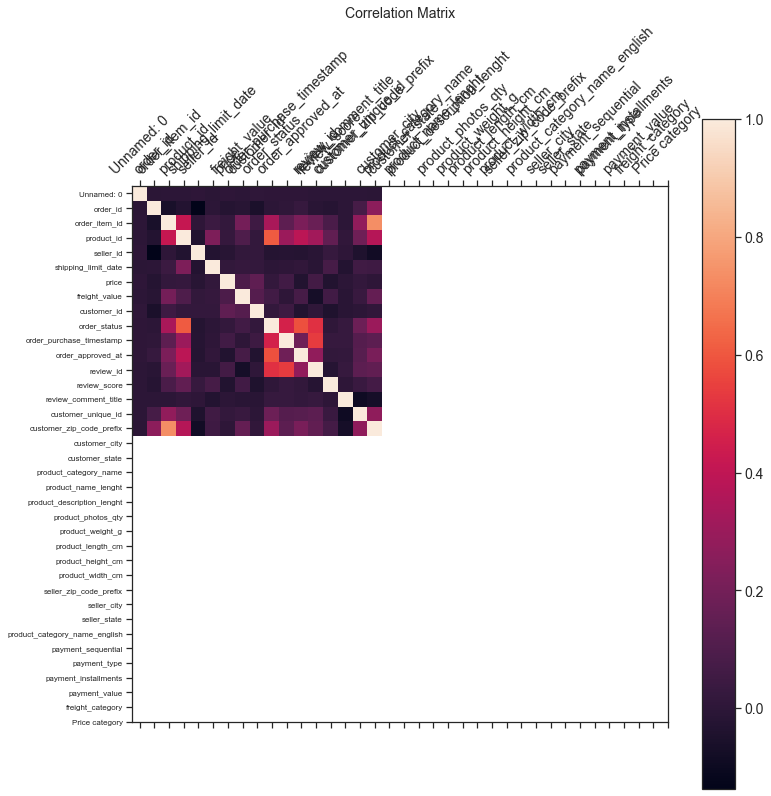

In [126]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(12, 12)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### Create a correlation heatmap using seaborn:

In [51]:
df.columns

Index(['Unnamed: 0', 'order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'review_id', 'review_score', 'review_comment_title',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name_english', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [59]:
# Create a subset excluding the "Date" and "No" columns

sub = df[['freight_value', 'product_name_lenght', 'review_score', 'price']]

In [60]:
sub

,freight_value,product_name_lenght,review_score,price
0,13.29,58.0,5.0,58.90
1,19.93,56.0,4.0,239.90
2,17.87,59.0,5.0,199.00
3,12.79,42.0,4.0,12.99
4,18.14,59.0,5.0,199.90
...,...,...,...,...
115718,43.41,43.0,5.0,299.99
115719,36.53,31.0,5.0,350.00
115720,16.95,43.0,5.0,99.90
115721,8.72,56.0,5.0,55.99


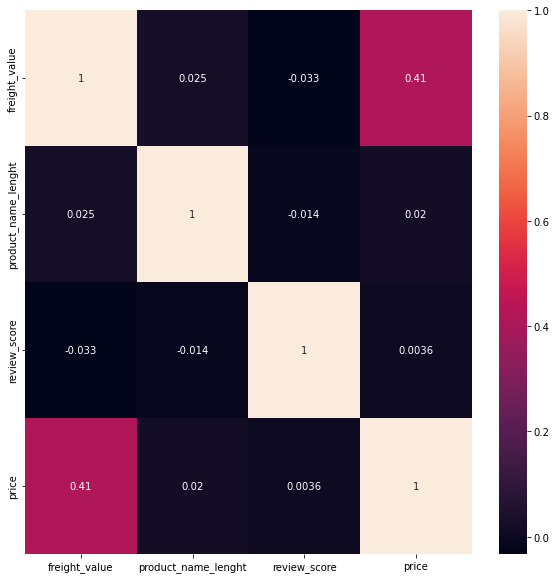

In [61]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [62]:
#Seems there are no clear correaltion between numerical values in datasets. There is howewer mild positive correlation between price and freight_value.

### Scatterplots:

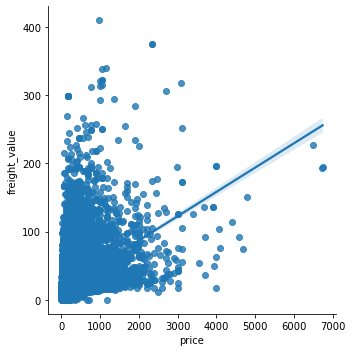

In [64]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn

sns.lmplot(x = 'price', y = 'freight_value', data = df)

In [ ]:
#Correlation looks too dense, hard to. understand any pattern. not useful. 

### Pair Plots:

In [66]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['freight_value', 'product_name_lenght', 'review_score', 'price']]

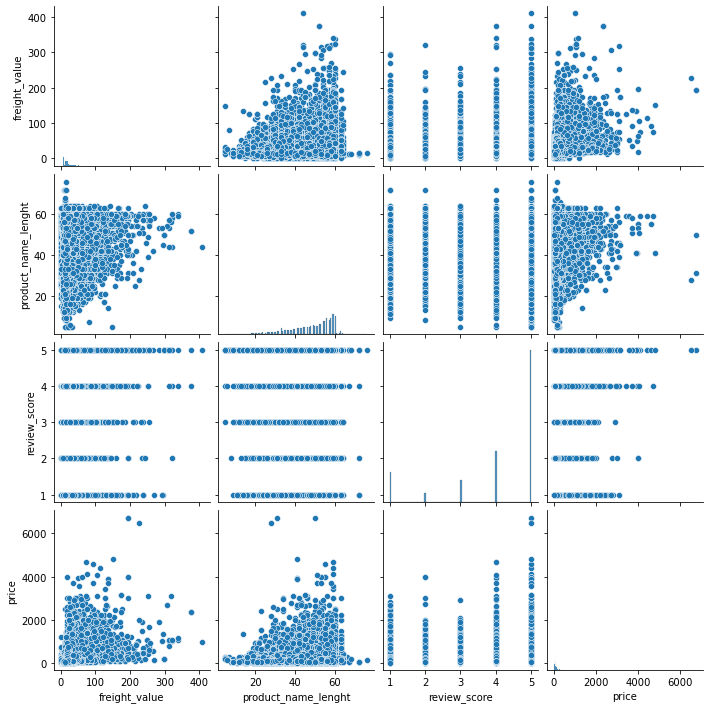

In [67]:
# Create a pair plot 

g = sns.pairplot(sub_2)

In [68]:
#Seems the higher the review score, the higher the price
#The longer the product name the more higher the price
#Price seems so somewhat increase with freight_value

### Categorical Plots:

##### Creating a categorical variable that splits the "Price per Unit" column into categories

In [91]:
df1 = df[df["freight_value"] < 100]


<AxesSubplot:xlabel='freight_value', ylabel='Count'>

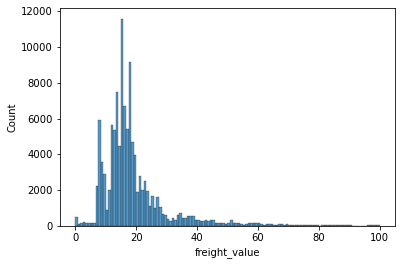

In [92]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df1['freight_value'], bins = 120)

In [105]:
df.loc[df['freight_value'] < 10, 'freight_category'] = 'Low  freight value'

In [106]:
df.loc[(df['freight_value'] >= 10) & (df['freight_value'] < 20), 'freight_category'] = 'Middle freight value'

In [107]:
df.loc[df['freight_value'] >= 20, 'freight_category'] = 'High freight value'

In [112]:
df['freight_category'].value_counts(dropna = False)

Middle freight value    67399
High freight value      32124
Low  freight value      16200
Name: freight_category, dtype: int64

In [113]:
df.columns

Index(['Unnamed: 0', 'order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'review_id', 'review_score', 'review_comment_title',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name_english', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'freight_category',
       'Price category'],
      dtype='object')

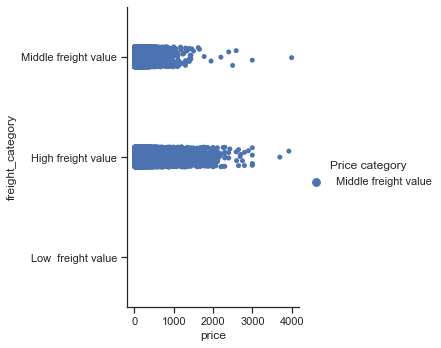

In [119]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="price", y="freight_category", hue="Price category", data=df)

In [127]:
#Price is increases with freight value

In [128]:
# fig = g.get_figure()
g.savefig("out.png") 

# Again, the image will be saved in the working directory. 

##Hypothesis

In [130]:
#Demand for good can be forecasted based on price, review_score and product_description_length.

In [132]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared data', '6.2B_df.csv'))

In [133]:
sub.to_csv(os.path.join(path, '02 Data', 'Prepared data', '6.2B_sub.csv'))